# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

19776


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codess

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load spatial distance from matrices

In [11]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


# Calculate power law scaling vs. genomic distance for each chromosome

In [15]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.ndimage import gaussian_filter
from numpy import ma
from scipy.optimize import curve_fit

def power_law(x, a, k):
    return a * np.power(x, k)

In [12]:
# cell types that have good number of cells
sel_class_list = ['Peri', 'Micro', 'Endo', 'Oligo','Astro',  'OPC', 
                              'Pvalb', 'Sst', 'Vip',
                              'L4/5 IT', 'L6 CT', 'L2/3 IT', 'L6b', 'L6 IT', 'L5 IT', 'L5 ET', ]

np.array(sel_class_list)

array(['Peri', 'Micro', 'Endo', 'Oligo', 'Astro', 'OPC', 'Pvalb', 'Sst',
       'Vip', 'L4/5 IT', 'L6 CT', 'L2/3 IT', 'L6b', 'L6 IT', 'L5 IT',
       'L5 ET'], dtype='<U7')

In [13]:
# excluding ChrX and ChrY
sorted_chroms = [str(_ch) for _ch in range(1,20)]

In [14]:
# short-range and long-range
distance_cutoff_dict = {'short_range':[0,1e7], 'long_range':[1e7,np.inf]}

In [16]:
# init dict to save results
scaling_result_dict = {'chr':[], 'celltype':[], 
                       'genomic_range':[], 'k':[],
                       }



for chosen_chrom in sorted_chroms[:]:
    _chr_codebook = codebook_df.loc[codebook_df['chr']==chosen_chrom]
    for sel_celltype in sel_class_list:
    #for sel_celltype in class_2_medianDict.keys():
        
        _region_centers = np.sort([np.mean(np.array(_n.split(chosen_chrom+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])
        median_mat = class_2_medianDict[sel_celltype][f'cis_{chosen_chrom}']
        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))
        # keep original entries as they will be sliced twice by genomic distance below
        gdist_entries_ori = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        median_entries_ori = median_mat[np.triu_indices(len(median_mat),1)]
        
        # slice by genomic distance
        for _dist_range, distance_cutoff in distance_cutoff_dict.items():
            mask = (gdist_entries_ori > distance_cutoff[0]) & (gdist_entries_ori < distance_cutoff[1])
            gdist_entries = gdist_entries_ori[mask]
            median_entries = median_entries_ori[mask]

            valid_inds = np.isfinite(np.log(gdist_entries)) & np.isfinite(np.log(median_entries))
            gdist_entries = gdist_entries[valid_inds]
            median_entries = median_entries[valid_inds]

            params, cov = curve_fit(power_law, gdist_entries, median_entries)
            a_fit, k_fit = params
            std_devs = np.sqrt(np.diag(cov))
            std_a, std_k = std_devs
            
            # append result
            scaling_result_dict['chr'].append(chosen_chrom)
            scaling_result_dict['celltype'].append(sel_celltype)
            scaling_result_dict['genomic_range'].append(_dist_range)
            scaling_result_dict['k'].append(k_fit)
            
            
scaling_result_df = pd.DataFrame(scaling_result_dict)

In [17]:
scaling_result_df.head()

,chr,celltype,genomic_range,k
0,1,Peri,short_range,0.191903
1,1,Peri,long_range,0.239388
2,1,Micro,short_range,0.186647
3,1,Micro,long_range,0.180907
4,1,Endo,short_range,0.197904


# Plot heatmap summary

In [18]:
# get plotting order using the cell-type median of one of the range
sel_df = scaling_result_df[scaling_result_df['genomic_range'] == 'short_range']
#sel_df = scaling_result_df[scaling_result_df['genomic_range'] == 'long_range']

pivot_df = pd.pivot_table(sel_df, values='k', index='chr', columns='celltype')
sorted_cell_order = pivot_df.median(axis=0).reset_index().sort_values(by=0)['celltype'].tolist()
np.array(sorted_cell_order)

array(['Peri', 'Micro', 'Endo', 'Oligo', 'Astro', 'OPC', 'L6b', 'L6 CT',
       'L4/5 IT', 'Sst', 'L6 IT', 'Vip', 'L5 ET', 'L5 IT', 'L2/3 IT',
       'Pvalb'], dtype='<U7')

meta NOT subset; don't know how to subset; dropped


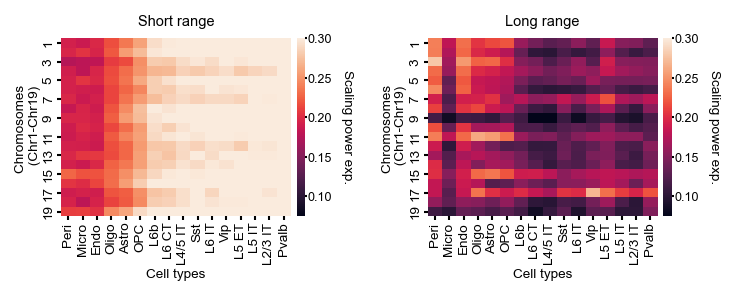

In [21]:
# plot heatmap
grange_list = ['short_range', 'long_range']

fig, ax = plt.subplots(1, len(grange_list), figsize=(2.5*len(grange_list),2), dpi=150)

for _idx, sel_range in enumerate(grange_list):

    # separate for short-range and long-range
    sel_df = scaling_result_df[scaling_result_df['genomic_range'] == sel_range]
    pivot_df = pd.pivot_table(sel_df, values='k', index='chr', columns='celltype')

    pivot_df = pivot_df[sorted_cell_order]
    pivot_df = pivot_df.reindex(sorted_chroms)

    # heatmap and color scaling
    if sel_range=='short_range':
        vmin, vmax = 0.075,0.3
    elif sel_range=='long_range':
        vmin, vmax = 0.075,0.3
    sns.heatmap(pivot_df, ax=ax[_idx], vmin = vmin, vmax=vmax, 
                cbar_kws={'label':'Scaling power', "pad": 0.02})

    # other plotting params
    ax[_idx].set_xlabel(f"Cell types", fontsize=_font_size-0.5, rotation=0,labelpad=2,)
    ax[_idx].set_ylabel(f"Chromosomes \n (Chr1-Chr19)", fontsize=_font_size-0.5, rotation=90,labelpad=1,)
    ax[_idx].tick_params('both',labelsize=_font_size-0.5, 
                    #width=_ticklabel_width, 
                   length=_ticklabel_size,
                    #labeltop=False,
                    pad=1, )
    ax[_idx].figure.axes[-1].tick_params(axis='y', length=1, pad=0.1, labelsize=_font_size-1,rotation=0,)
    ax[_idx].figure.axes[-1].set_ylabel('Scaling power exp.', fontsize=_font_size-0.5, rotation=270, labelpad=10)

    TickLabels = pivot_df.columns
    ax[_idx].set_xticks(np.arange(0,len(pivot_df.columns))+0.5)
    ax[_idx].set_xticklabels(TickLabels,rotation=90,fontdict={'fontsize':_font_size-0.5})
    
    ax[_idx].set_title (sel_range.replace('_',' ').capitalize(), fontsize=7)

plt.tight_layout()
plt.savefig(os.path.join(output_figure_folder,f'scaling_summary_heatmap.pdf'),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()